## CS 210 Fall 2023
#### Lecture 19

In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Visualization

#### Mapping non-numeric labels to numeric values for x ticks

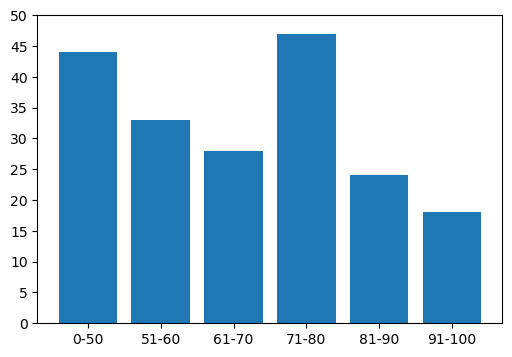

In [2]:
# alternatively, can give a numeric range for xticks, and map labels to the tick numbers
score_ranges = ['0-50','51-60','61-70','71-80','81-90','91-100']
num_students = [44,33,28,47,24,18]
plt.figure(figsize=(6,4))
plt.bar(range(len(num_students)), num_students)
plt.xticks(range(len(num_students)),score_ranges)  # first arg is numeric set, second is mapped labels
plt.yticks(range(0,51,5))
plt.show()

#### Abutting edges, bar color, bar width

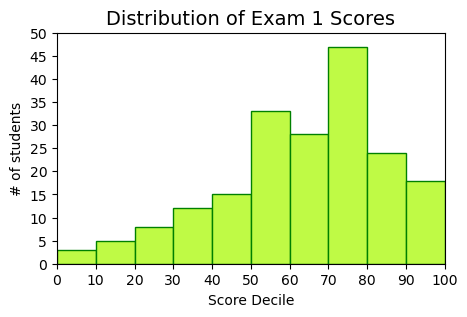

In [3]:
num_students = [3,5,8,12,15,33,28,47,24,18]
plt.figure(figsize=(5, 3))
plt.bar(range(5,100,10),  # start range at 5
            num_students,
            10,  # width of each bar is 10
            color='#bffa45',
            edgecolor='green')  # bar edge color
plt.xticks(range(0,101,10))
plt.yticks(range(0,51,5))
plt.xlim(0,100)
plt.xlabel('Score Decile')
plt.ylabel('# of students')
plt.title('Distribution of Exam 1 Scores',fontsize='14')
plt.show()

#### Comparative Bar Charts
When you want to plot side-by-side bars for comparison, just shift the x points to the right for every new bar set

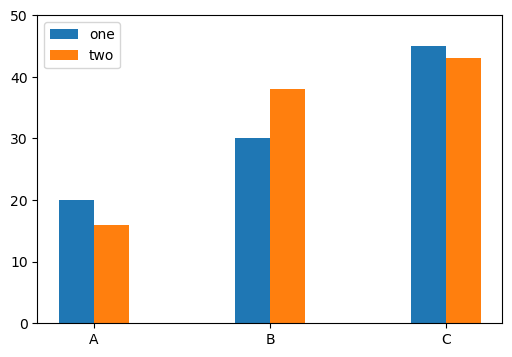

In [4]:
y1 = [20,30,45]
x1 = [5,25,45]   # xticks - 2
plt.figure(figsize=(6, 4))
plt.bar(x1,y1,4,label='one') # width = 4
y2 = [16,38,43]
x2 = [9,29,49]   # xticks + 2
plt.bar(x2,y2,4,label='two') # width = 4
plt.xticks([7,27,47],['A','B','C'])   # map labels to numeric tick values
plt.ylim(0,50)  # lim includes both ends
plt.legend()
plt.show()

This is what we wanted, but choosing the points for `x1`, `x2`, and `xticks` was a lot of work. 

Let's see if we can get pandas to do the work instead. 

<Axes: >

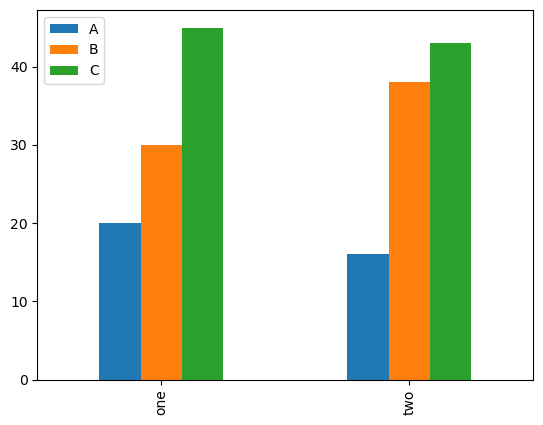

In [5]:
y = pd.DataFrame([y1, y2], index=["one", "two"], columns=["A", "B", "C"])
y.plot(kind='bar')

Unfortunately, our axes are flipped. 

But wait! We know how to swap axes! 

<Axes: >

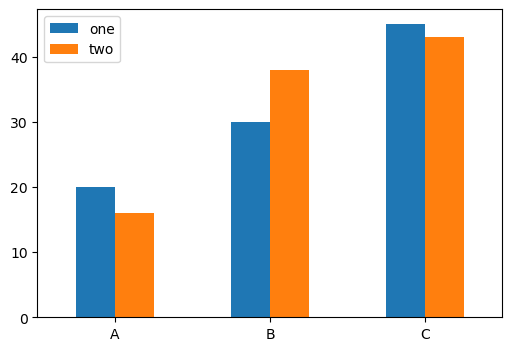

In [6]:
y.T.plot(kind='bar', figsize=(6,4), rot=0) # rot=0 controls the rotation of the xtick labels

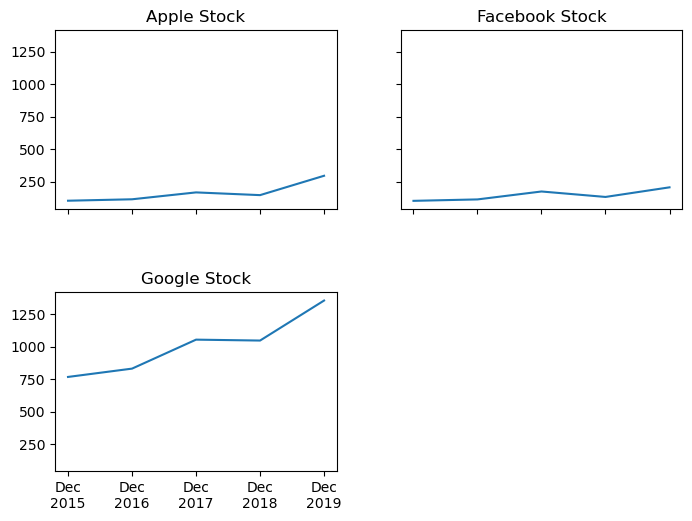

In [7]:
# do plots for Apple and Facebook
# share the y-axes and x-axes
fig, axes = plt.subplots(2,2,figsize=(7, 5),sharey=True,sharex=True)
fig.tight_layout(h_pad=5.0,w_pad=3.0)

years = [2015,2016,2017,2018,2019]

# first figure for Apple stock
apple_share_price = [105,116,169,148,297]
axes[0][0].plot(years,apple_share_price)
axes[0][0].set_title('Apple Stock')

# second figure for Facebook stock
facebook_share_price = [104,115,176,134,208]
axes[0][1].plot(years,facebook_share_price)
axes[0][1].set_title('Facebook Stock')

# third figure for Google
google_share_price = [766,830,1053,1046,1354]
axes[1][0].plot(years,google_share_price)
axes[1][0].set_title('Google Stock')

# last subplot unused, turn it off
axes[1][1].set_axis_off()

# x ticks and labels for all
axes[0][0].set_xticks([2015,2016,2017,2018,2019])
axes[0][0].set_xticklabels(
            ['Dec\n2015','Dec\n2016','Dec\n2017','Dec\n2018','Dec\n2019'])

plt.show()

**In the above, since the subplot [1][1] is turned off, the x-axis ticks aren't set and can't be shared with the [0][1] subplot above it. So we need to explicitly set ticks for the [0][1] subplot.**

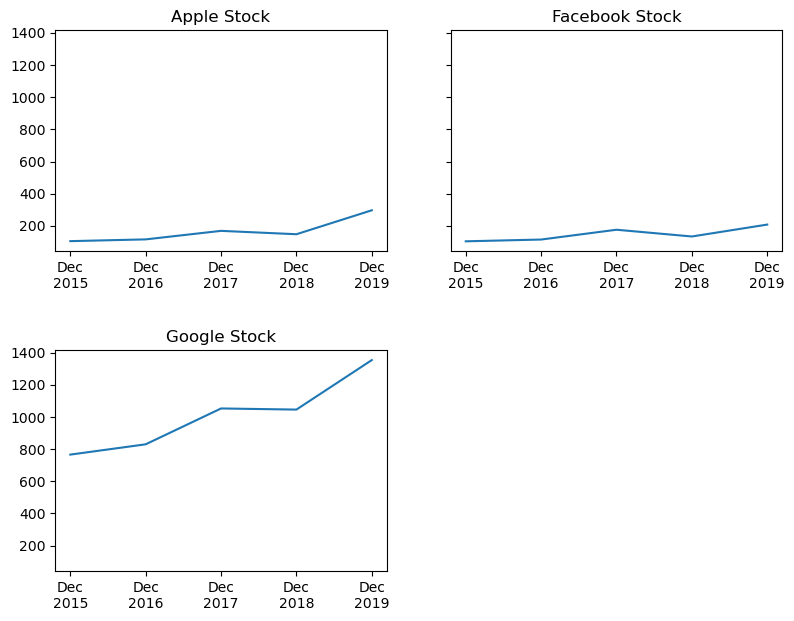

In [8]:
# do plots for Apple and Facebook
# share the y-axes and x-axes
fig, axes = plt.subplots(2,2,figsize=(8, 6),sharey=True)
fig.tight_layout(h_pad=5.0,w_pad=3.0)

years = [2015,2016,2017,2018,2019]

# first figure for Apple stock
apple_share_price = [105,116,169,148,297]
axes[0][0].plot(years,apple_share_price)
axes[0][0].set_title('Apple Stock')

# second figure for Facebook stock
facebook_share_price = [104,115,176,134,208]
axes[0][1].plot(years,facebook_share_price)
axes[0][1].set_title('Facebook Stock')

# third figure for Google
google_share_price = [766,830,1053,1046,1354]
axes[1][0].plot(years,google_share_price)
axes[1][0].set_title('Google Stock')

# last subplot unused, turn it off
axes[1][1].set_axis_off()

# x ticks and labels for all
for i in (0,1):
    for j in (0,1):
        axes[i][j].set_xticks([2015,2016,2017,2018,2019])
        axes[i][j].set_xticklabels(
            ['Dec\n2015','Dec\n2016','Dec\n2017','Dec\n2018','Dec\n2019'])
plt.show()


### Data Curation and Exploration

#### Titanic Dataset from Kaggle
https://www.kaggle.com/c/titanic

**On the Kaggle page above, if you look at the Data tab, you will see files named train.csv (training set), and test.csv (test set). The training set has 891 instances, and the test set has 418 instances. The training set was downloaded and renamed as titanic_train.csv**

In [9]:
titanic_file = 'titanic_train.csv'
titanic = pd.read_csv(titanic_file)

In [10]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**An explanation for the columns is given in the Data tab, under Data Dictionary**

In [11]:
# column data information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **Cabin (only 204/891) and Age (only 714/891) have lots of missing values, and Embarked has 2 missing values**

##### Missing values in numeric columns

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### **AGE: mean is about 29, median (50% cutoff) is 28. Let's replace missing values with mean or median, since they are about the same.**

In [13]:
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [14]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [15]:
# reveiw info, all Age columns should now be filled
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic.loc[[5,17,19,26,28]]  # verify 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q


##### Missing values in non-numeric (categorical) columns

##### **Embarkation ports**

In [17]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# let's see what is the distribution of Embarked values
embarked_vc = titanic['Embarked'].value_counts()
print(embarked_vc)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


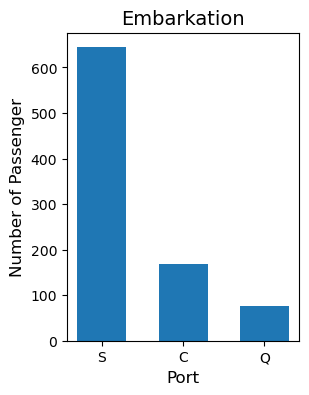

In [19]:
# plot bar chart for counts at embarkation ports
plt.figure(figsize=(3,4))
plt.bar(range(len(embarked_vc)),embarked_vc.values, width=0.6)
plt.xticks(range(len(embarked_vc)),embarked_vc.index)
plt.title('Embarkation',fontsize=14)
plt.xlabel('Port',fontsize=12)
plt.ylabel('Number of Passenger',fontsize=12)
plt.show()

##### **Can also plot directly from Pandas**

  Port  Passengers
0    S         644
1    C         168
2    Q          77


Text(0.5, 0, 'Port')

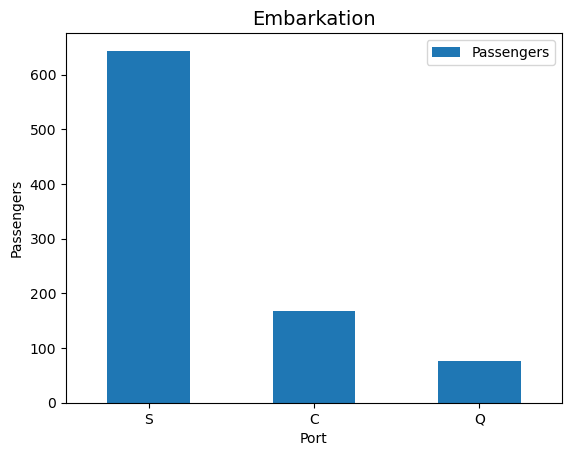

In [20]:
edf = pd.DataFrame(embarked_vc)
# we need the S,C,Q index values to be in a separate column
edf = edf.reset_index()  
edf.columns = ['Port','Passengers']
print(edf)

ax = edf.plot.bar(x='Port', y='Passengers', rot=0)
ax.set_title("Embarkation", fontsize=14)
ax.set_ylabel("Passengers")
ax.set_xlabel("Port")

Text(0.5, 0, 'Port')

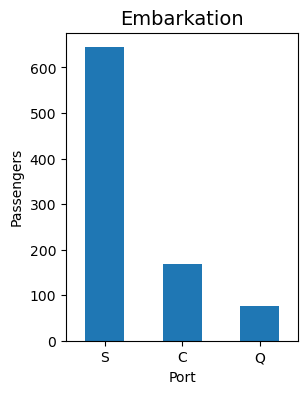

In [21]:
# value_counts has a plot method also
ax = embarked_vc.plot.bar(figsize=(3,4), x='Port', y='Passengers', rot=0)
ax.set_title("Embarkation", fontsize=14)
ax.set_ylabel("Passengers")
ax.set_xlabel("Port")

##### **An often used option for replacement of null categorial values is to use the most frequent value**

In [22]:
# replace the missing Embarked values with 'S'
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [23]:
# verify that count for S has been updated, from 644 to 646
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

##### Plot the age distribution

In [24]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

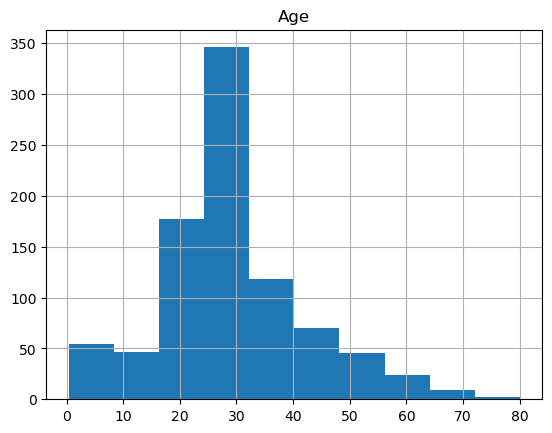

In [25]:
titanic.hist(column='Age')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

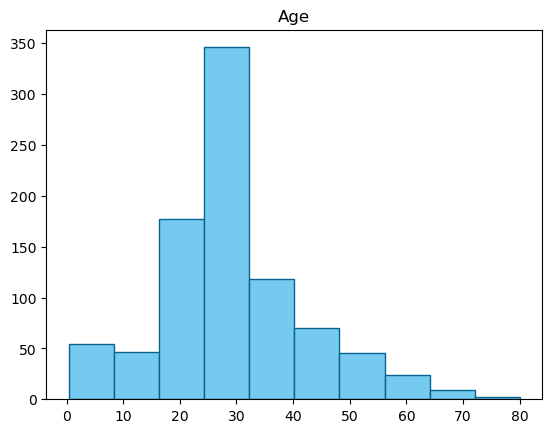

In [26]:
titanic.hist(column='Age',grid=False,color='#76c9ef',edgecolor='#056590')

#### Exploring the California Housing Dataset

#### Presented in Aurelien Geron's book "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow"
https://github.com/ageron/handson-ml2/tree/master/datasets/housing

Also see:<br>
https://developers.google.com/machine-learning/crash-course/california-housing-data-description

**Get the housing data<br>**
URL: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz

In [27]:
import urllib, tarfile

housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
urllib.request.urlretrieve(housing_url, 'housing.tgz')
housing_tgz = tarfile.open('housing.tgz')
housing_tgz.extractall()
housing_tgz.close()

**Load the extracted csv file into a DataFrame**

In [28]:
housing = pd.read_csv('housing.csv')

##### **Big Picture**

In [29]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**See https://developers.google.com/machine-learning/crash-course/california-housing-data-description<br>
for a description of each of these columns. In particular, median income is in tens of thousands of dollars.**

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**The only column that has null values is total_bedrooms**

##### **Ocean Proximity**

In [31]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [32]:
ocp = pd.DataFrame(housing['ocean_proximity'].value_counts())
ocp

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [33]:
ocp = ocp.reset_index()
ocp.columns = ['Ocean Proximity','Blocks']
ocp

,Ocean Proximity,Blocks
0,<1H OCEAN,9136
1,INLAND,6551
2,NEAR OCEAN,2658
3,NEAR BAY,2290
4,ISLAND,5


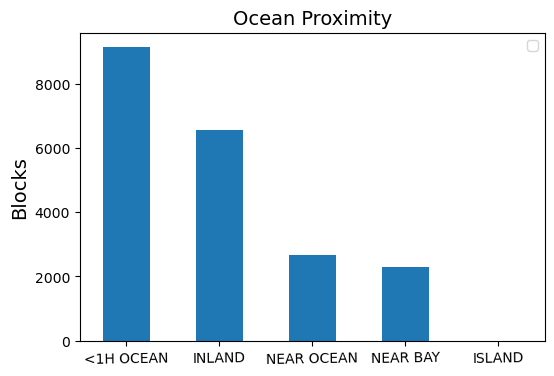

In [34]:
axis = ocp.plot(figsize=(6,4),x='Ocean Proximity',y='Blocks',kind='bar',rot=1)
axis.set_ylabel('Blocks',fontsize=14)
axis.set_xlabel('')
axis.set_title('Ocean Proximity',fontsize=14)
axis.legend('') 

##### **Histograms for numerical attributes**

In [35]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

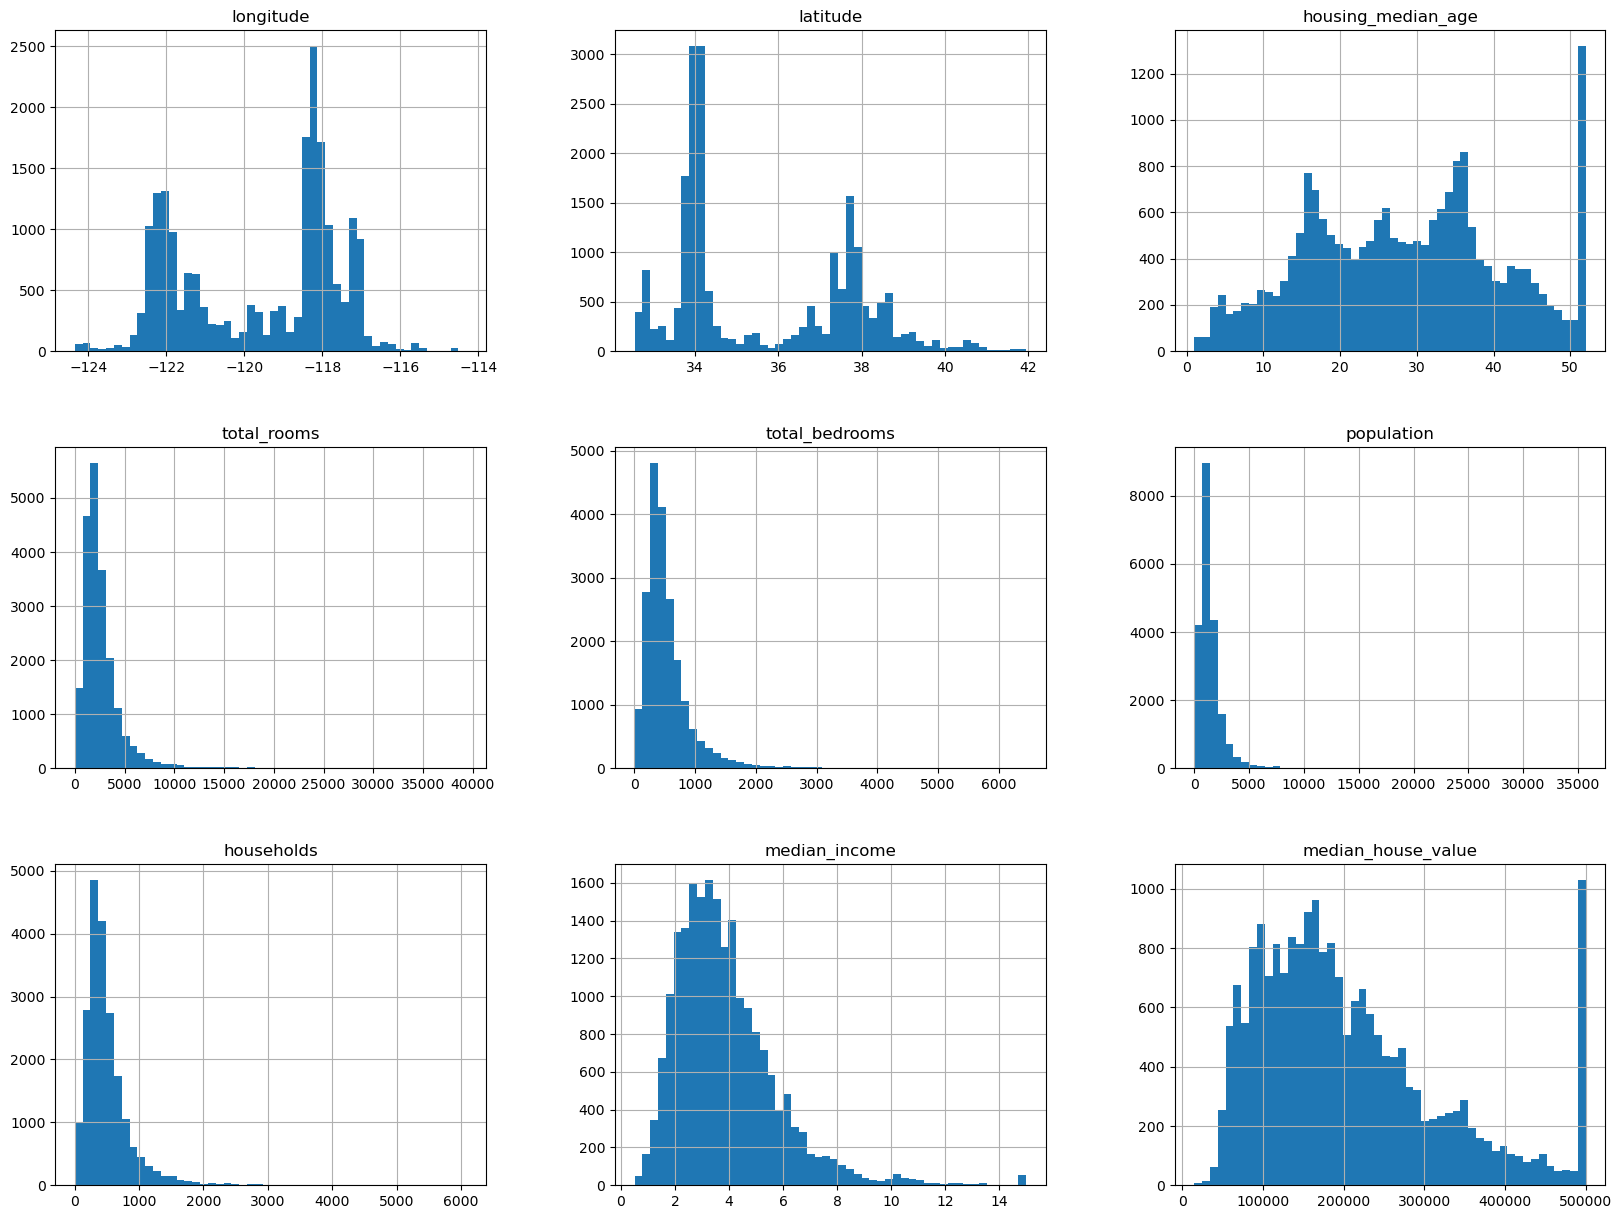

In [36]:
housing.hist(bins=50, figsize=(20,15))

##### **Income Categories**
Make a new column for income categories by partitioning median income into 5 classes: 1,2,3,4,5 for incomes in the ranges (0, 1.5), (1.5, 3.0), (3.0, 4.5), (4.5, 6.0), 6.0 and over. Use **Pandas.cut**
method

In [37]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1,2,3,4,5])

In [38]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
ic_vals = housing['income_cat'].value_counts()
print(ic_vals)

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


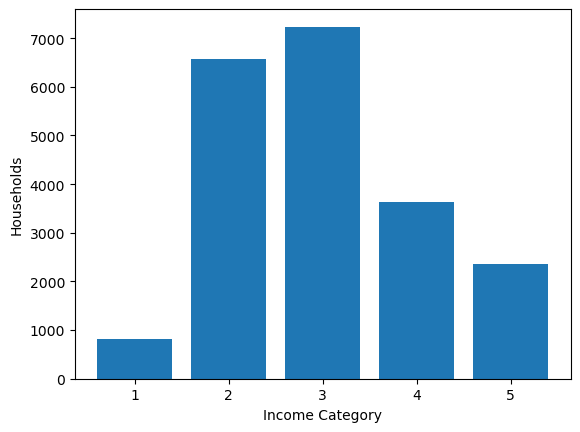

In [41]:
plt.bar(ic_vals.index, ic_vals.values)
plt.xlabel("Income Category")
plt.ylabel("Households")
plt.show()

##### **Longitude-Latitude Map like plot**

<Axes: xlabel='longitude', ylabel='latitude'>

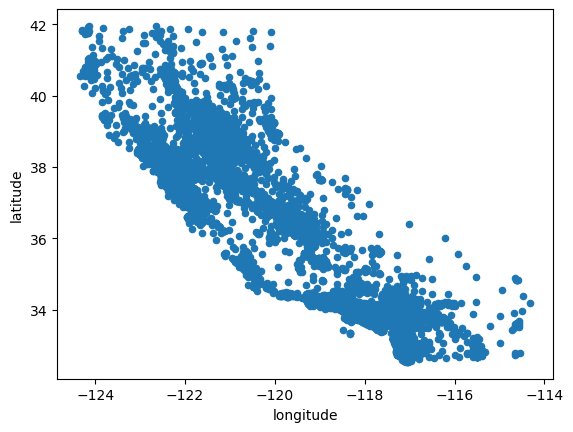

In [42]:
housing.plot(kind='scatter',x='longitude',y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

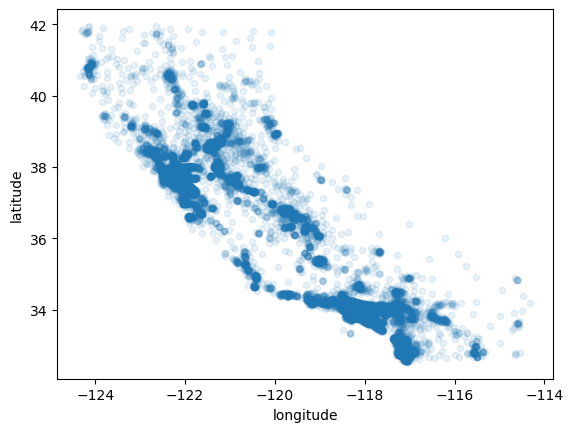

In [43]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

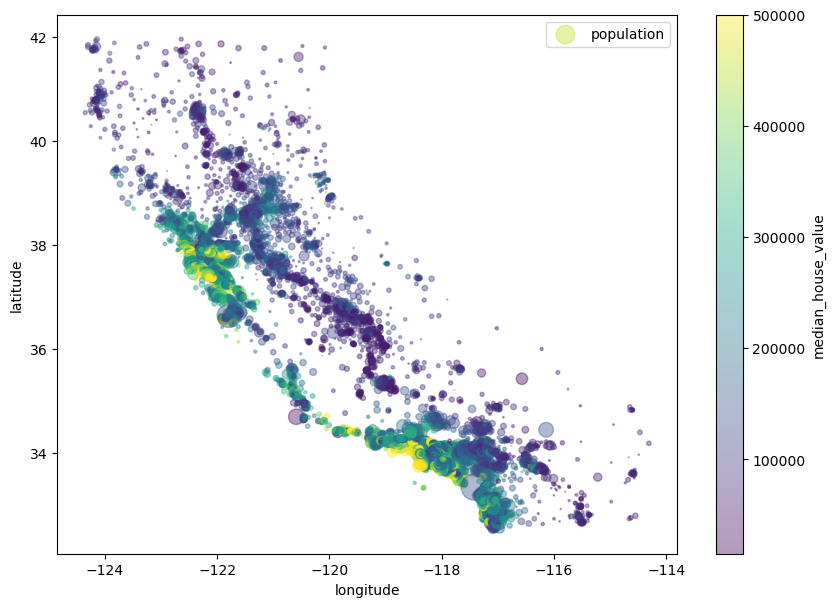

In [44]:
# heat map
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',
             figsize=(10,7),c='median_house_value',
             colorbar=True)

## Relational Databases

https://dev.mysql.com/doc/refman/8.2/en/installing.html

#### <font color="brown">Example 1: Nobel Prize Winners Database</font>

##### <font color="brown">We are going to build a database for the noble prize winner data.</font>

In [45]:
import json, requests

nobel_url ='http://api.nobelprize.org/v1/prize.json'
resp = requests.get(nobel_url)
nobels = json.loads(resp.text)

In [46]:
print(nobels['prizes'][0])

{'year': '2023', 'category': 'chemistry', 'laureates': [{'id': '1029', 'firstname': 'Moungi', 'surname': 'Bawendi', 'motivation': '"for the discovery and synthesis of quantum dots"', 'share': '3'}, {'id': '1030', 'firstname': 'Louis', 'surname': 'Brus', 'motivation': '"for the discovery and synthesis of quantum dots"', 'share': '3'}, {'id': '1031', 'firstname': 'Aleksey', 'surname': 'Yekimov', 'motivation': '"for the discovery and synthesis of quantum dots"', 'share': '3'}]}


In [47]:
print(nobels['prizes'][0].keys())

dict_keys(['year', 'category', 'laureates'])


In [1]:
print(nobels['prizes'][1])

NameError: name 'nobels' is not defined

**Each entry in the list of values for nobels['prizes'] is a dictionary of year+category+list of laureates**

In [49]:
print(nobels['prizes'][1]['laureates'][0])

{'id': '1034', 'firstname': 'Claudia', 'surname': 'Goldin', 'motivation': '"for having advanced our understanding of women’s labour market outcomes"', 'share': '1'}


##### <font color="brown">The data we want is Year, Category, First Name, Last Name, Motivation, and Share for each Nobel prize winner (laureate)</font>

##### In order to set aside most appropriate amount of space for storage in the database, we need to know maximum lengths for the motivation, first name, and last name strings.

In [50]:
# max lengths of motivation, first name, and last name
category_maxlen=0
motiv_maxlen=0
fname_maxlen=0
lname_maxlen=0
no_laureates = []
for prize in nobels['prizes']:
    if not 'laureates' in prize:
        no_laureates.append(prize['year'])
        continue
    cat = prize['category']
    category_maxlen = max(category_maxlen, len(cat))
    for winner in prize['laureates']:
        motiv = winner.get('motivation').strip('"')
        motiv_maxlen = max(motiv_maxlen, len(motiv))
        fname = winner.get('firstname')
        fname_maxlen = max(fname_maxlen, len(fname))
        lname = winner.get('surname','')
        lname_maxlen = max(lname_maxlen, len(lname))

print(f'No laureates in the years: {no_laureates}\n')
print('Max lengths')
print(f'Category: {category_maxlen}')
print(f'Motivation: {motiv_maxlen}')
print(f'First name: {fname_maxlen}')
print(f'Last name: {lname_maxlen}')

No laureates in the years: ['1972', '1967', '1966', '1956', '1955', '1948', '1943', '1943', '1942', '1942', '1942', '1942', '1942', '1941', '1941', '1941', '1941', '1941', '1940', '1940', '1940', '1940', '1940', '1939', '1935', '1934', '1933', '1932', '1931', '1928', '1925', '1924', '1924', '1923', '1921', '1919', '1918', '1918', '1918', '1917', '1917', '1916', '1916', '1916', '1916', '1915', '1915', '1914', '1914']

Max lengths
Category: 10
Motivation: 374
First name: 59
Last name: 26


#### <font color="brown">Creating a new user in database system</font>

##### Execute the following commands in the MySQL client window to create a new non-root user. You want to log in as this user when using any of the databases other than the special 'mysql' database.

- Launch terminal in Jupyter, then in the terminal log into the <tt>mysql</tt> database, which is the master database that contains all user-defined databases
    
    <pre>
    % mysql -u root -p mysql
    ...
    </pre>

- 'mysql>' is the prompt inside the MySQL session. The <tt>create user</tt> statement can then be used to create a new database system user. See https://dev.mysql.com/doc/refman/8.0/en/create-user.html <br> Give the user whatever name you like, and whatever password you want:

    <pre>
    mysql> create user 'someusername'@'localhost' identified by 'somepassword'
    ...
    </pre>

- Exit the MySQL client session

    <pre>
    mysql> exit
    </pre>

#### <font color="brown">Creating a nobels database</font>

##### <font color="brown">1. Create a database named nobels</font>

##### Execute the following commands in the MySQL client window to create the 'nobels' database, and grant permissions to your non-root user

- '>' is an example of a terminal prompt.<br>Log into the <tt>mysql</tt> database, which is the master database that contains all user-defined databases
    
    <pre>
    > mysql -u root -p mysql
    ...
    </pre>

- The <tt>show databases</tt> statement lists all databases you have created. <br><b>Note: all commands in the mysql session end in ';'</b>

    <pre>
    mysql> show databases;
    ...
    </pre>

- Create the database with the <tt>create database</tt> statement<br>
https://dev.mysql.com/doc/refman/8.0/en/create-database.html

    <pre>
    mysql> create database nobels;
    ...
    </pre>

    <pre>
    mysql> show databases;
    ...
    </pre>
    
    You should see the nobels database in the list shown by the <tt>show databases</tt> command

- Grant 'all' (create/update/read) access to the non-root user you set up earlier (my non-root user is 'john')

    <pre>
    mysql> grant all on nobels.* to 'john'@'localhost';
    ...
    </pre>

- Exit the MySQL client session

    <pre>
    mysql> exit
    
    >
    </pre>

##### <font color="brown">2. Create a winners table in the database</font>

##### **i) Define a couple of columns to start with - execute the following in the MySQL client window:**

- You need to first log in to the <tt>nobels</tt> database as a non-root user to whom you have granted access, using whatever password you set for that user.<br>
<b>Note: you can manipulate the nobels database when you are logged in as root to the mysql database, but it is
    not recommended. The root user has admin privileges that you might inadvertently use and thrash stuff that
    might affect other databases as well.</b>

<pre>
    > mysql -u bob -p nobels
    ...
</pre>

- Once you are logged in to the <tt>nobels</tt> database, you can see what tables there are if any (there are no tables, since we didn't make any yet), then go ahead and create a table called <tt>winners</tt><br>
    https://dev.mysql.com/doc/refman/8.0/en/create-table.html
    
<pre>
    mysql> show tables;
    Empty set (0.00 sec)

    mysql> create table winners (year year not null, category char(10) not null);
    Query OK, 0 rows affected (0.03 sec)
</pre>

- Column <tt>year</tt> has datatype <tt>year</tt><br>
https://dev.mysql.com/doc/refman/8.0/en/year.html
- Column <tt>category</tt> has datatype <tt>char(10)</tt> meaning space worth 10 characters. The actual number of characters stored in this space may be less than 10, but 10 characters of space is always set aside.<br>
https://dev.mysql.com/doc/refman/8.0/en/char.html
- When you set a column to be **not null**, it means when you add a row, that column *must* have a value, otherwise the database system will reject the add

<pre>
    mysql> show tables;
    +------------------+
    | Tables_in_nobels |
    +------------------+
    | winners          |
    +------------------+
    1 row in set (0.00 sec)
</pre>

- You can see the table schema (structure) with the <tt>desc</tt> statement:

<pre>
    mysql> desc winners;
    +----------+----------+------+-----+---------+-------+
    | Field    | Type     | Null | Key | Default | Extra |
    +----------+----------+------+-----+---------+-------+
    | year     | year(4)  | NO   |     | NULL    |       |
    | category | char(10) | NO   |     | NULL    |       |
    +----------+----------+------+-----+---------+-------+
    2 rows in set (0.00 sec)
</pre>

- Alternatively, you can use the <tt>show columns from<tt> statement<br>
   https://dev.mysql.com/doc/refman/8.0/en/show-columns.html
    
<pre>
    mysql> show columns from winners;
    +----------+----------+------+-----+---------+-------+
    | Field    | Type     | Null | Key | Default | Extra |
    +----------+----------+------+-----+---------+-------+
    | year     | year(4)  | NO   |     | NULL    |       |
    | category | char(10) | NO   |     | NULL    |       |
    +----------+----------+------+-----+---------+-------+
    2 rows in set (0.00 sec)
</pre>
    
- The default value being NULL simply means that whenever you add a row, you must supply a value. If you had chosen to NOT say *not null*, it means a null (no value) is allowed. In which case, you may specifiy a default, which would be the assumed value if none is supplied - see the **lname** column below.

##### **ii) Add in the rest of the columns**

<pre>
mysql> alter table winners add column fname varchar(80) not null;
mysql> alter table winners add column lname varchar(40);
mysql> alter table winners add column motivation varchar(500) not null;
mysql> alter table winners add column share tinyint not null;
</pre>

##### 
- The <tt>alter table</tt> statement can be used to add or modify columns <br>
https://dev.mysql.com/doc/refman/8.0/en/alter-table.html
- You don't *have* to do it this way (create with a few columns, then add in all the rest), but it is sometimes easier to break it up like this than have a super long <tt>create table</tt> statement
- The <tt>fname</tt>, <tt>lname</tt>, and <tt>motivation</tt> columns are all of type <tt>varchar</tt>, with a different number of characters, based on our earlier analysis of maximum lengths for these fields (and we added on some). Basically <tt>varchar</tt> is for variable characters, meaning the space specified is the maximum, but unlike <tt>char</tt> the actual storage will not necessarily equal the maximum specified. Instead, it will be the actual number of characters, plus a very small amount of constant extra space to tell how many actual characters there are:<br>
https://dev.mysql.com/doc/refman/8.0/en/storage-requirements.html#data-types-storage-reqs-strings
- The <tt>share</tt> column is of type </tt>tinyint</tt>, which is the least amount of integer space you can set aside for a column<br>
https://dev.mysql.com/doc/refman/8.0/en/storage-requirements.html#data-types-storage-reqs-numeric

<pre>
    mysql> show columns from winners;
    +------------+--------------+------+-----+---------+-------+
    | Field      | Type         | Null | Key | Default | Extra |
    +------------+--------------+------+-----+---------+-------+
    | year       | year(4)      | NO   |     | NULL    |       |
    | category   | char(10)     | NO   |     | NULL    |       |
    | fname      | varchar(80)  | NO   |     | NULL    |       |
    | lname      | varchar(40)  | YES  |     | NULL    |       |
    | motivation | varchar(500) | NO   |     | NULL    |       |
    | share      | tinyint(4)   | NO   |     | NULL    |       |
    +------------+--------------+------+-----+---------+-------+
    6 rows in set (0.00 sec)
</pre>

##### Key can be any column or combinaton of columns that has unique values. In this table, no column has unique values. We could do a combination of year and category as unique, since no two rows can have the same combination of year and category, but we will leave it aside for now.

#### <font color="brown">Loading data into winners table</font>

##### The JSON data can be added to the winners table via Python, but we will get to the Python-based database access later. For now, we will load data from a pre-done database file, nobelsv1.sql

##### Make sure the nobelsv1.sql file is in your notebook. Then, in Terminal (make sure you have exited mysql), issue the following command, to position yourself in the directory where you have this notebook. (Replace the path in this example with that on your computer. If you are Windows, your path will be something like C:\\...)
<pre>
> cd /home/john/Rutgers/cs210/lectures/19
</pre>

##### Then, issue the following command to load the data from `nobels_v1.sql` into the nobels database:
<pre>
> mysql -u john -p nobels < nobels_v1.sql
</pre>

#### <font color="brown">Quering the winners Table</font>

##### **Queries are done using the <tt>select</tt> statement**
https://dev.mysql.com/doc/refman/8.0/en/select.html

##### **The result of any query is a table**

##### **1. How many entries are in the table?**

<pre>
mysql> select count(*) from winners;
+----------+
| count(*) |
+----------+
|      975 |
+----------+
</pre>

##### **2. Show the first 5 rows in the table**

<pre>
mysql> select * from winners limit 5;
+------+-----------+----------+-----------+---------------------------------------------------------------------------------+-------+
| year | category  | fname    | lname     | motivation                                                                      | share |
+------+-----------+----------+-----------+---------------------------------------------------------------------------------+-------+
| 2021 | Chemistry | Benjamin | List      | for the development of asymmetric organocatalysis                               |     2 |
| 2021 | Chemistry | David    | MacMillan | for the development of asymmetric organocatalysis                               |     2 |
| 2021 | Economics | David    | Card      | for his empirical contributions  to labour economics                            |     2 |
| 2021 | Economics | Joshua   | Angrist   | for their methodological contributions to the analysis  of causal relationships |     4 |
| 2021 | Economics | Guido    | Imbens    | for their methodological contributions to the analysis  of causal relationships |     4 |
+------+-----------+----------+-----------+---------------------------------------------------------------------------------+-------+
</pre>

**<tt>select *</tt>** selects all columns.<p>

This can be hard to read if any of the columns is extra long. In which case, an alternative is to use this variant, with a '\G' at the end of the query:
<pre>
mysql> select * from winners limit 5\G;
*************************** 1. row ***************************
      year: 2021
  category: Chemistry
     fname: Benjamin
     lname: List
motivation: for the development of asymmetric organocatalysis
     share: 2
*************************** 2. row ***************************
      year: 2021
  category: Chemistry
     fname: David
     lname: MacMillan
motivation: for the development of asymmetric organocatalysis
     share: 2
*************************** 3. row ***************************
      year: 2021
  category: Economics
     fname: David
     lname: Card
motivation: for his empirical contributions  to labour economics
     share: 2
*************************** 4. row ***************************
      year: 2021
  category: Economics
     fname: Joshua
     lname: Angrist
motivation: for their methodological contributions to the analysis  of causal relationships
     share: 4
*************************** 5. row ***************************
      year: 2021
  category: Economics
     fname: Guido
     lname: Imbens
motivation: for their methodological contributions to the analysis  of causal relationships
     share: 4
</pre>


##### **3. What are all the years for which nobel winners are listed?**

<pre>
mysql> select distinct(year) from winners;
+------+
| year |
+------+
| 2021 |
| 2020 |
| 2019 |
| 2018 |
| 2017 |
| 2016 |
  ...
  ...
| 1903 |
| 1902 |
| 1901 |
+------+
</pre>

##### **4. For how many years are winners listed?**

<pre>
mysql> select count(distinct(year)) from winners;
+-----------------------+
| count(distinct(year)) |
+-----------------------+
|                   118 |
+-----------------------+
</pre>

##### **5. Who are all the winners in 2020, and for what category?**

<pre>
mysql> select category, fname, lname from winners where year=2020;
+------------+----------------------+-------------+
| category   | fname                | lname       |
+------------+----------------------+-------------+
| Chemistry  | Emmanuelle           | Charpentier |
| Chemistry  | Jennifer A.          | Doudna      |
| Economics  | Paul                 | Milgrom     |
| Economics  | Robert               | Wilson      |
| Literature | Louise               | Glück       |
| Peace      | World Food Programme |             |
| Physics    | Roger                | Penrose     |
| Physics    | Reinhard             | Genzel      |
| Physics    | Andrea               | Ghez        |
| Medicine   | Harvey               | Alter       |
| Medicine   | Michael              | Houghton    |
| Medicine   | Charles              | Rice        |
+------------+----------------------+-------------+
12 rows in set (0.00 sec)
</pre>
- Any number of columns can be specified in the **select** statement, separated by commas
- The **where** clause sets up a condition

##### **6. Who were the winners of the Literature prize in the years 2011 thru 2021?**

<pre>
mysql> select fname, lname, year from winners where category='Literature' and year between 2010 and 2020;
+------------+--------------+------+
| fname      | lname        | year |
+------------+--------------+------+
| Abdulrazak | Gurnah       | 2021 |
| Louise     | Glück        | 2020 |
| Peter      | Handke       | 2019 |
| Olga       | Tokarczuk    | 2018 |
| Kazuo      | Ishiguro     | 2017 |
| Bob        | Dylan        | 2016 |
| Svetlana   | Alexievich   | 2015 |
| Patrick    | Modiano      | 2014 |
| Alice      | Munro        | 2013 |
| Mo         | Yan          | 2012 |
| Tomas      | Tranströmer  | 2011 |
+------------+--------------+------+
</pre>
- For numeric types, you can use the **between** keyword to select range

##### **7. List all details of all the prizes that Einstein won**

<pre>
mysql> select * from winners where lname='Einstein'\G;
*************************** 1. row ***************************
      year: 1921
  category: Physics
     fname: Albert
     lname: Einstein
motivation: for his services to Theoretical Physics, and especially for his discovery of the law of the photoelectric effect
     share: 1
</pre>

#### <font color="brown">Example 2: Nobel Prize Winners Database - Version 2</font>

#### Minimizing Redundancy of Data Storage

##### <font color="brown">Where is the redundancy in the previous version with a single winners table?</font>

##### **1. If the nobel prize for a year is shared by multiple people, the year and category are repeated for each.**

<pre>
mysql> select count(*) from winners where share=1;
+----------+
| count(*) |
+----------+
|      353 |
+----------+

mysql> select count(*) from winners;
+----------+
| count(*) |
+----------+
|      975 |
+----------+
mysql> 
</pre>
Out of a total of 975, 353 winners are solos. So 622 winners--nearly two thirds--have shared their prize, and for each of these, there will be repeated values for year and category.

##### <font color="brown">A minimum-redundancy version would have year and category in a separate table, say **yearcat**,<br> with a *manufactured* unique integer id that would serve as a **primary key**.</font>

##### **2. There is also redundancy in the motivation, when prize is shared.**

For instance:
<pre>
select fname,lname,motivation,share from winners where year=2018 and category='Chemistry';
+----------------+--------+--------------------------------------------------+-------+
| fname          | lname  | motivation                                       | share |
+----------------+--------+--------------------------------------------------+-------+
| Frances H.     | Arnold | for the directed evolution of enzymes            |     2 |
| George P.      | Smith  | for the phage display of peptides and antibodies |     4 |
| Sir Gregory P. | Winter | for the phage display of peptides and antibodies |     4 |
+----------------+--------+--------------------------------------------------+-------+
</pre>
This is even worse than year/category redundancy since the motivation string can be fairly long. (As an aside, note that not all sharing winners are listed with the same motivation - winners could have worked in different areas for a prize in a year and category.)

##### <font color="brown">To remove this redundancy, we can make another table for motivation, say **contributon** with a *manufactured* unique integer id that would serve as the primary key.</font>

##### <font color="brown">Finally, the actual winner table, say **laureate**, would have a firstname, lastname, and share for each winner, plus a column that would be a **foreign key** that refers to the year-category in the **yearcat** table, and another column that would be another foreign key that refers to the contribution for that winner.</font>

#### <font color="brown">Database Schema</font>

##### 1. Log in to the **nobels** database

<pre>
> mysql -u john -p nobels
...
</pre>
You can drop the table <tt>winners</tt> if you would like, like this (<font color="red">but don't do it yet!</font>):
<pre>
mysql> drop table winners;
</pre>
https://dev.mysql.com/doc/refman/8.0/en/drop-table.html

##### 2. Create table **yearcat**

<pre>
mysql> create table yearcat (
        id smallint auto_increment primary key, 
        year year not null, 
        category char(10) not null);
</pre>

- The datatype <tt>smallint</tt> holds a greater range of values than <tt>tinyint</tt><br>
https://dev.mysql.com/doc/refman/8.0/en/integer-types.html
- Every time you add a new row, <tt>auto_increment</tt> ensures that the <tt>id</tt> value is 1 more than the current maximum value, starting with 1 for the first row that was added.
- The <tt>id</tt> column is the primary key for this table. The database system will ensure that searches based on primary key are fast. By definition, the primary key column has unique non-null values. There can be at most one primary key for a table.

<pre>
mysql> desc yearcat;
+----------+-------------+------+-----+---------+----------------+
| Field    | Type        | Null | Key | Default | Extra          |
+----------+-------------+------+-----+---------+----------------+
| id       | smallint(6) | NO   | PRI | NULL    | auto_increment |
| year     | year(4)     | NO   |     | NULL    |                |
| category | char(10)    | NO   |     | NULL    |                |
+----------+-------------+------+-----+---------+----------------+
</pre>

##### 3. Create table **contribution**

<pre>
mysql> create table contribution (
        id smallint auto_increment primary key, 
        motivation varchar(500) not null);
        
mysql> desc contribution;
+------------+--------------+------+-----+---------+----------------+
| Field      | Type         | Null | Key | Default | Extra          |
+------------+--------------+------+-----+---------+----------------+
| id         | smallint(6)  | NO   | PRI | NULL    | auto_increment |
| motivation | varchar(500) | NO   |     | NULL    |                |
+------------+--------------+------+-----+---------+----------------+
</pre>


##### 4. Create table **laureate**

<pre>
mysql> create table laureate (
        fname varchar(80) not null, 
        lname varchar(40), 
        share tinyint not null,
        year_cat_id smallint not null,
        motiv_id smallint not null,
        foreign key (year_cat_id) references yearcat(id),
        foreign key (motiv_id) references contribution(id));
</pre>

- The columns <tt>year_cat_id</tt> and <tt>motiv_id</tt> are *dependent* on values in other tables. In this case, they are both **foriegn keys** that reference the primary key of the tables <tt>yearcat</tt> and <tt>contribution</tt>, respectively.

<pre>
mysql> desc laureate;
+-------------+--------------+------+-----+---------+-------+
| Field       | Type         | Null | Key | Default | Extra |
+-------------+--------------+------+-----+---------+-------+
| fname       | varchar(80)  | NO   |     | NULL    |       |
| lname       | varchar(40)  | YES  |     | NULL    |       |
| share       | tinyint(4)   | NO   |     | NULL    |       |
| year_cat_id | smallint(6)  | NO   | MUL | NULL    |       |
| motiv_id    | smallint(6)  | NO   | MUL | NULL    |       |
+-------------+--------------+------+-----+---------+-------+
</pre>

**Showing a table description doesn't give details of foreign key (constraint)**

In the above table description, for the keys year_cat_id and motiv_id, it says "MUL" for key, but it's not clear on what other key they depend.

**You can see the details via the <font color="brown">show create table</font> statement**
<pre>
mysql> show create table laureate\G;
*************************** 1. row ***************************
       Table: laureate
Create Table: CREATE TABLE `laureate` (
  `fname` varchar(80) NOT NULL,
  `lname` varchar(40) DEFAULT NULL,
  `share` tinyint NOT NULL,
  `year_cat_id` smallint NOT NULL,
  `motiv_id` smallint NOT NULL,
  KEY `year_cat_id` (`year_cat_id`),
  KEY `motiv_id` (`motiv_id`),
  CONSTRAINT `laureate_ibfk_1` FOREIGN KEY (`year_cat_id`) REFERENCES `yearcat` (`id`),
  CONSTRAINT `laureate_ibfk_2` FOREIGN KEY (`motiv_id`) REFERENCES `contribution` (`id`)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci
</pre>

#### Solutions to Exercises